### UNIFOR - MBA em Ciência de Dados

#### Introdução a Aprendizado de Máquina

##### Divaldo Aderaldo de Oliveira Júnior (2419413)


Objetivo: Por meio de AM, identificar os jogadores mais superfaturados no dataset da NBA.


### Importação de Dados


In [9]:
import pandas as pd
pd.set_option('display.max_columns', None)

nba_stats_df = pd.read_csv('./data/nba_stats.csv')
nba_stats_df.head()

,year,name,playerId,playerSlug,positionId,teamId,status,gamesPlayed,avgMinutes,avgFouls,flagrantFouls,technicalFouls,ejections,doubleDouble,tripleDouble,minutes,rebounds,fouls,avgRebounds,avgPoints,avgFieldGoalsMade,avgFieldGoalsAttempted,fieldGoalPct,avgThreePointFieldGoalsMade,avgThreePointFieldGoalsAttempted,threePointFieldGoalPct,avgFreeThrowsMade,avgFreeThrowsAttempted,freeThrowPct,avgAssists,avgTurnovers,points,fieldGoalsMade,fieldGoalsAttempted,threePointFieldGoalsMade,threePointFieldGoalsAttempted,freeThrowsMade,freeThrowsAttempted,assists,turnovers,avgSteals,avgBlocks,steals,blocks,position,birthdate,college,draftinfo,birthplace,team,htwt,experience,rankingSalary,salary
0,1999,Allen Iverson,366,allen-iverson,SG,PHI,inactive,48.0,41.458332,2.041667,0.0,5.0,0.0,4.0,0.0,1990.0,236.0,98.0,4.916666,26.750000,9.062500,22.000000,41.193001,1.208333,4.145834,29.145730,7.416666,9.875000,75.105003,4.645834,3.479167,1284.0,435.0,1056.0,58.0,199.0,356.0,474.0,223.0,167.0,2.291667,0.145833,110.0,7.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,15,"$9,000,000"
1,2000,Allen Iverson,366,allen-iverson,SG,PHI,inactive,70.0,40.757140,2.314286,0.0,12.0,0.0,1.0,0.0,2853.0,267.0,162.0,3.814286,28.414286,10.414286,24.757143,42.066002,1.271429,3.728571,34.099618,6.314286,8.857142,71.290001,4.685714,3.285714,1989.0,729.0,1733.0,89.0,261.0,442.0,620.0,328.0,230.0,2.057143,0.071429,144.0,5.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,27,"$10,125,000"
2,2001,Allen Iverson,366,allen-iverson,SG,PHI,inactive,71.0,41.957745,2.070423,0.0,18.0,0.0,4.0,0.0,2979.0,273.0,147.0,3.845070,31.084507,10.732394,25.535212,42.029999,1.380282,4.309859,32.026145,8.239436,10.126760,81.362999,4.577465,3.338028,2207.0,762.0,1813.0,98.0,306.0,585.0,719.0,325.0,237.0,2.507042,0.281690,178.0,20.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,17,"$11,250,000"
3,2002,Allen Iverson,366,allen-iverson,SG,PHI,inactive,60.0,43.700000,1.700000,0.0,12.0,1.0,4.0,1.0,2622.0,269.0,102.0,4.483333,31.383333,11.083333,27.816668,39.844002,1.300000,4.466667,29.104477,7.916666,9.750000,81.196999,5.516667,3.950000,1883.0,665.0,1669.0,78.0,268.0,475.0,585.0,331.0,237.0,2.800000,0.216667,168.0,13.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,14,"$12,375,000"
4,2003,Allen Iverson,366,allen-iverson,SG,PHI,inactive,82.0,42.500000,1.817073,0.0,8.0,0.0,6.0,0.0,3485.0,344.0,149.0,4.195122,27.585365,9.804878,23.658537,41.443001,1.024390,3.695122,27.722773,6.951220,8.975610,77.445999,5.536585,3.487805,2262.0,804.0,1940.0,84.0,303.0,570.0,736.0,454.0,286.0,2.743902,0.158537,225.0,13.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,11,"$13,500,000"


In [8]:
nba_stats_df_with_numerical_salary = nba_stats_df.copy()
nba_stats_df_with_numerical_salary['salary'] = nba_stats_df_with_numerical_salary['salary'].replace(
    {'\\$': '', ',': ''}, regex=True).astype(float)
nba_stats_df_with_numerical_salary.head()

,year,name,playerId,playerSlug,positionId,teamId,status,gamesPlayed,avgMinutes,avgFouls,flagrantFouls,technicalFouls,ejections,doubleDouble,tripleDouble,minutes,rebounds,fouls,avgRebounds,avgPoints,avgFieldGoalsMade,avgFieldGoalsAttempted,fieldGoalPct,avgThreePointFieldGoalsMade,avgThreePointFieldGoalsAttempted,threePointFieldGoalPct,avgFreeThrowsMade,avgFreeThrowsAttempted,freeThrowPct,avgAssists,avgTurnovers,points,fieldGoalsMade,fieldGoalsAttempted,threePointFieldGoalsMade,threePointFieldGoalsAttempted,freeThrowsMade,freeThrowsAttempted,assists,turnovers,avgSteals,avgBlocks,steals,blocks,position,birthdate,college,draftinfo,birthplace,team,htwt,experience,rankingSalary,salary
0,1999,Allen Iverson,366,allen-iverson,SG,PHI,inactive,48.0,41.458332,2.041667,0.0,5.0,0.0,4.0,0.0,1990.0,236.0,98.0,4.916666,26.750000,9.062500,22.000000,41.193001,1.208333,4.145834,29.145730,7.416666,9.875000,75.105003,4.645834,3.479167,1284.0,435.0,1056.0,58.0,199.0,356.0,474.0,223.0,167.0,2.291667,0.145833,110.0,7.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,15,9000000.0
1,2000,Allen Iverson,366,allen-iverson,SG,PHI,inactive,70.0,40.757140,2.314286,0.0,12.0,0.0,1.0,0.0,2853.0,267.0,162.0,3.814286,28.414286,10.414286,24.757143,42.066002,1.271429,3.728571,34.099618,6.314286,8.857142,71.290001,4.685714,3.285714,1989.0,729.0,1733.0,89.0,261.0,442.0,620.0,328.0,230.0,2.057143,0.071429,144.0,5.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,27,10125000.0
2,2001,Allen Iverson,366,allen-iverson,SG,PHI,inactive,71.0,41.957745,2.070423,0.0,18.0,0.0,4.0,0.0,2979.0,273.0,147.0,3.845070,31.084507,10.732394,25.535212,42.029999,1.380282,4.309859,32.026145,8.239436,10.126760,81.362999,4.577465,3.338028,2207.0,762.0,1813.0,98.0,306.0,585.0,719.0,325.0,237.0,2.507042,0.281690,178.0,20.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,17,11250000.0
3,2002,Allen Iverson,366,allen-iverson,SG,PHI,inactive,60.0,43.700000,1.700000,0.0,12.0,1.0,4.0,1.0,2622.0,269.0,102.0,4.483333,31.383333,11.083333,27.816668,39.844002,1.300000,4.466667,29.104477,7.916666,9.750000,81.196999,5.516667,3.950000,1883.0,665.0,1669.0,78.0,268.0,475.0,585.0,331.0,237.0,2.800000,0.216667,168.0,13.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,14,12375000.0
4,2003,Allen Iverson,366,allen-iverson,SG,PHI,inactive,82.0,42.500000,1.817073,0.0,8.0,0.0,6.0,0.0,3485.0,344.0,149.0,4.195122,27.585365,9.804878,23.658537,41.443001,1.024390,3.695122,27.722773,6.951220,8.975610,77.445999,5.536585,3.487805,2262.0,804.0,1940.0,84.0,303.0,570.0,736.0,454.0,286.0,2.743902,0.158537,225.0,13.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,11,13500000.0


### Checagem de Correlação de Features


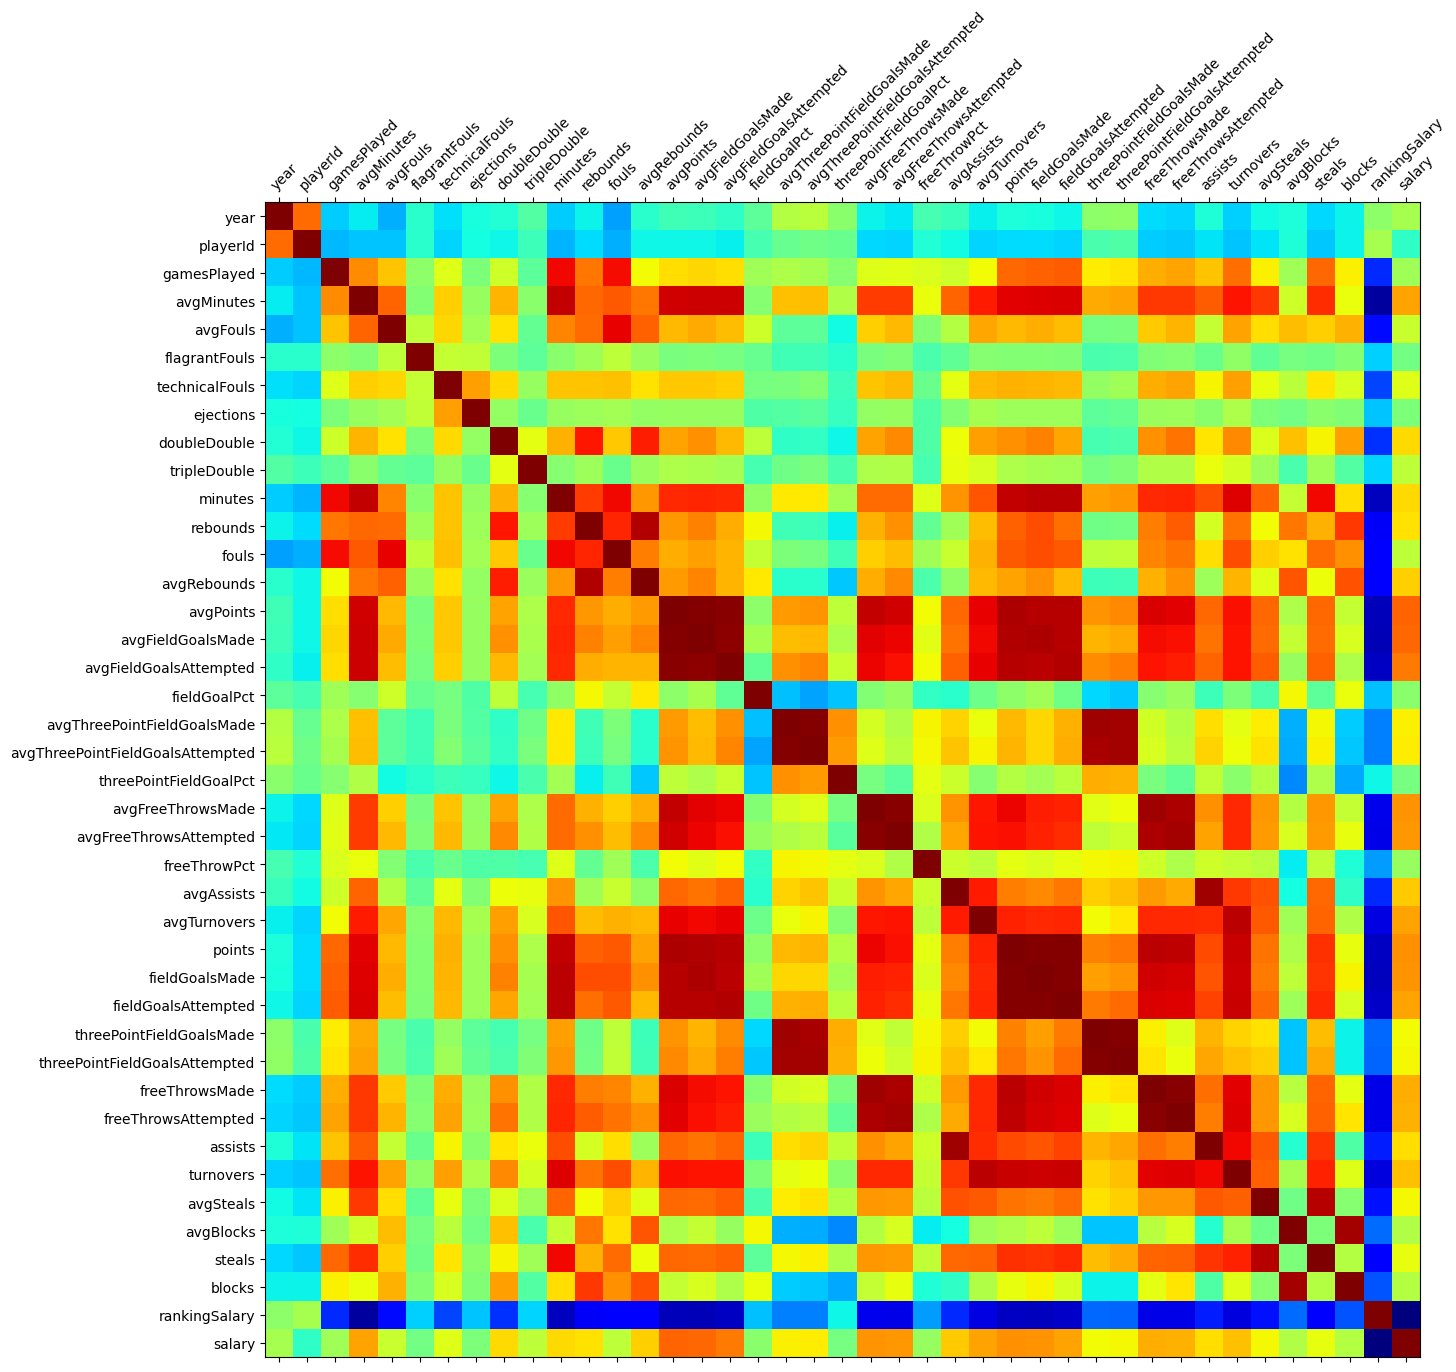

In [6]:
import matplotlib.pyplot as plt

corr_matrix = nba_stats_df_with_numerical_salary.corr(numeric_only=True)

columns = list(corr_matrix.columns)

cm = plt.get_cmap('jet')

fig, ax = plt.subplots(figsize=(15, 15))
ax.matshow(corr_matrix, cmap=cm)

ax.set_xticks(range(len(columns)))
ax.set_yticks(range(len(columns)))
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)

r = plt.setp(ax.get_xticklabels(), rotation=45,
             ha="left", rotation_mode="anchor")

In [7]:
corr_matrix['salary'][corr_matrix['salary'].abs() < 0.1]

playerId   -0.014321
Name: salary, dtype: float64

"playerId" tem uma correlação baixa o suficiente com "salary" para ser descartado, mas isso não é necessário nesta etapa, pois ele será removido posteriormente no pipeline, juntamente com outros valores considerados desnecessários para a atribuição de salário.


### Divisão em Conjuntos de Treino e Teste com Valor Estratificado


In [12]:
nba_stats_df_with_numerical_salary['positionId'].value_counts(dropna=False)

positionId
C      1530
PF     1422
SG     1261
PG     1214
SF     1191
G       786
F       751
NaN       6
GF        1
Name: count, dtype: int64

In [13]:
nba_stats_filtered = nba_stats_df_with_numerical_salary[nba_stats_df_with_numerical_salary['positionId'] != 'GF'].dropna(subset=[
                                                                             'positionId'])
nba_stats_filtered['positionId'].value_counts(dropna=False)

positionId
C     1530
PF    1422
SG    1261
PG    1214
SF    1191
G      786
F      751
Name: count, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

test_size = 0.2
random_state = 1001
strat_train_set, strat_test_set = train_test_split(nba_stats_filtered,
                                                   test_size=test_size,
                                                   random_state=random_state,
                                                   stratify=nba_stats_filtered['positionId'])

nba_stats_train_set = strat_train_set.drop('salary', axis=1)
nba_stats_train_set_labels = strat_train_set['salary'].copy()

nba_stats_test_set = strat_test_set.drop('salary', axis=1)
nba_stats_test_set_labels = strat_test_set['salary'].copy()

### Transformação de Dados por Pipeline


In [20]:
import numpy as np
from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
import re

np.set_printoptions(threshold=np.inf)

class FeatureRemover(BaseEstimator, TransformerMixin):
    def __init__(self, features_to_remove):
        self.features_to_remove = features_to_remove

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(columns=self.features_to_remove)


class AgeFeatureCreator(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        def calculate_age(row):
            if pd.isna(row['year']) or pd.isna(row['birthdate']):
                return np.nan

            birthdate_str = row['birthdate']

            match = re.search(r'\((\d+)\)', birthdate_str)

            if match:
                age = int(match.group(1))
                return age

            clean_birthdate_str = birthdate_str.split(' (')[0]

            birthdate = pd.to_datetime(clean_birthdate_str, format='%m/%d/%Y')
            return row['year'] - birthdate.year

        X['age'] = X.apply(calculate_age, axis=1)

        X = X.drop(columns=['birthdate'])

        return X


redundant_features = ['playerId', 'name', 'playerSlug', 'team', 'position', 'rankingSalary']

transform_attribs = redundant_features + ['year', 'birthdate']
transform_pipeline = Pipeline([
    ('feature_remover', FeatureRemover(features_to_remove=redundant_features)),
    ('age_feature_creator', AgeFeatureCreator())
])

num_attribs = nba_stats_train_set.select_dtypes(
    include=['int64', 'float64']).columns
num_attribs = num_attribs.difference(redundant_features)
num_attribs = num_attribs.append(pd.Index(['age']))

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('normalizer', StandardScaler())
])

cat_attribs = nba_stats_train_set.select_dtypes(include=['object']).columns
cat_attribs = cat_attribs.difference(redundant_features + ['birthdate'])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

preprocessing_pipeline = Pipeline([
    ('transform_pipeline', transform_pipeline),
    ('column_transformer', ColumnTransformer(
        transformers=[
            ('num_pipeline', num_pipeline, num_attribs),
            ('cat_pipeline', cat_pipeline, cat_attribs)
        ])
     )
])

nba_stats_train_set_prepared = preprocessing_pipeline.fit_transform(nba_stats_train_set)

### Testes de Modelos de AM


#### Regressão Linear

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
scores = cross_val_score(lin_reg,
                         nba_stats_train_set_prepared,
                         nba_stats_train_set_labels,
                         scoring='neg_mean_squared_error',
                         cv=4)

lin_reg_rmse_score = np.sqrt(-scores)

print(lin_reg_rmse_score)
print(lin_reg_rmse_score.mean())
print(lin_reg_rmse_score.std())

[8.99371715e+16 1.44244609e+16 1.29837725e+15 5.37564407e+06]
2.6415002406340948e+16
3.710605159752457e+16


#### Árvore de Decisão

In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

dec_tree_reg = DecisionTreeRegressor()

scores = cross_val_score(dec_tree_reg,
                         nba_stats_train_set_prepared,
                         nba_stats_train_set_labels,
                         scoring='neg_mean_squared_error',
                         cv = 4)

dec_tree_reg_rmse_score = np.sqrt(-scores)

print(dec_tree_reg_rmse_score)
print(dec_tree_reg_rmse_score.mean())
print(dec_tree_reg_rmse_score.std())

[5239813.63645702 5338392.67250853 5181067.41145135 5472237.68096592]
5307877.850345705
110293.84946360176


#### Floresta Aleatória

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rand_forest_reg = RandomForestRegressor()

scores = cross_val_score(rand_forest_reg,
                         nba_stats_train_set_prepared,
                         nba_stats_train_set_labels,
                         scoring='neg_mean_squared_error',
                         cv=4)

rand_forest_reg_rmse_score = np.sqrt(-scores)

print(rand_forest_reg_rmse_score)
print(rand_forest_reg_rmse_score.mean())
print(rand_forest_reg_rmse_score.std())

[3820986.54136224 3950599.42159424 3814836.30237093 3938887.74952903]
3881327.5037141107
63588.30886781528


Floresta Aleatória é o melhor entre os modelos para o problema.

#### Ajuste de Parâmetros com GridSearchCV

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rand_forest_reg = RandomForestRegressor()

### 1
# param_grid = [{'n_estimators': [3, 30], 'max_features': [2, 8, 32]},
#               {'bootstrap':[False],'n_estimators':[3, 30],'max_features':[2, 4, 8, 16, 32]}]

### 2
# param_grid = [{'bootstrap':[False],'n_estimators':[30, 90, 120, 180],'max_features':[8, 16, 32]}]

### 3
param_grid = [{'bootstrap':[False],'n_estimators':[120, 180, 240],'max_features':[32, 48, 64]}]

grid_search = GridSearchCV(rand_forest_reg,
                           param_grid,
                           scoring='neg_mean_squared_error',
                           refit=True,
                           cv = 5,
                           return_train_score=True)

grid_search.fit(nba_stats_train_set_prepared, nba_stats_train_set_labels)

print(grid_search.best_params_)

{'bootstrap': False, 'max_features': 64, 'n_estimators': 180}


In [22]:
rand_forest_reg = grid_search.best_estimator_

print(rand_forest_reg.get_params())

{'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 64, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 180, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [23]:
d = grid_search.cv_results_

for mean_train_score,mean_test_score,params in zip(d['mean_train_score'],d['mean_test_score'],d['params']):
    print(np.sqrt(-mean_train_score),np.sqrt(-mean_test_score),params)

695.0923090477309 4162516.7784815035 {'bootstrap': False, 'max_features': 32, 'n_estimators': 120}
848.7730298541943 4120964.4604051844 {'bootstrap': False, 'max_features': 32, 'n_estimators': 180}
697.469974826594 4135773.933300558 {'bootstrap': False, 'max_features': 32, 'n_estimators': 240}
733.0712652156101 4133624.389950161 {'bootstrap': False, 'max_features': 48, 'n_estimators': 120}
662.4137029996343 4131062.8093350483 {'bootstrap': False, 'max_features': 48, 'n_estimators': 180}
645.8992644568696 4117840.705547883 {'bootstrap': False, 'max_features': 48, 'n_estimators': 240}
646.0203031010748 4116402.1710941307 {'bootstrap': False, 'max_features': 64, 'n_estimators': 120}
478.80175734503 4100807.4842427983 {'bootstrap': False, 'max_features': 64, 'n_estimators': 180}
566.6494940930564 4112523.4583695107 {'bootstrap': False, 'max_features': 64, 'n_estimators': 240}


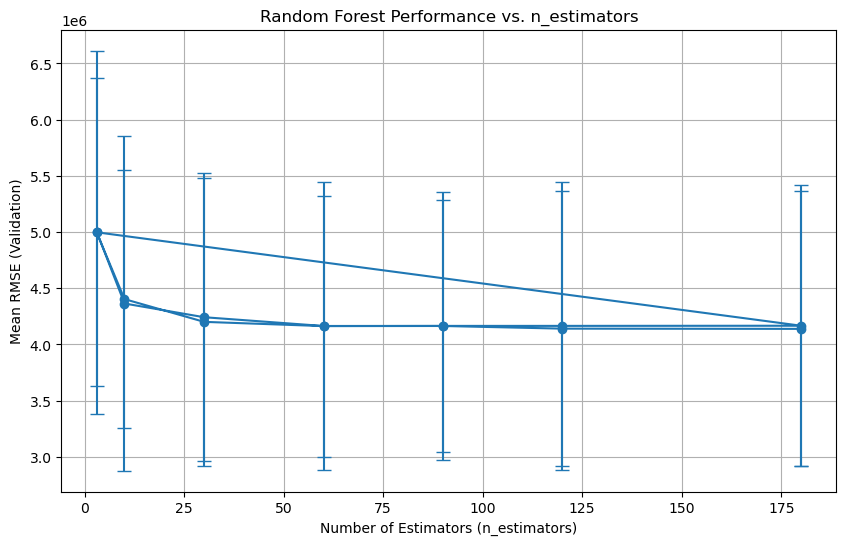

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cv_results = grid_search.cv_results_

results_df = pd.DataFrame({
    'n_estimators': [param['n_estimators'] for param in cv_results['params']],
    'mean_test_score': cv_results['mean_test_score'],
    'std_test_score': cv_results['std_test_score']
})

results_df['mean_rmse'] = np.sqrt(-results_df['mean_test_score'])
results_df['std_rmse'] = np.sqrt(results_df['std_test_score'])

plt.figure(figsize=(10, 6))
plt.errorbar(results_df['n_estimators'], results_df['mean_rmse'],
             yerr=results_df['std_rmse'], fmt='-o', capsize=5)
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Mean RMSE (Validation)')
plt.title('Random Forest Performance vs. n_estimators')
plt.grid(True)
plt.show()


"bootstrap: false" leva aos melhores resultados, e n_estimators começa a ter retornos decrescentes após chegar em 30.

### Análise com Conjunto de Teste

In [24]:
from sklearn.metrics import mean_squared_error

nba_stats_test_set_prepared = preprocessing_pipeline.transform(nba_stats_test_set)

nba_stats_test_set_predicted = rand_forest_reg.predict(nba_stats_test_set_prepared)

rand_forest_reg_rmse = np.sqrt(mean_squared_error(nba_stats_test_set_labels, nba_stats_test_set_predicted))
print(rand_forest_reg_rmse)

4014501.088739534


In [25]:
mean_value = nba_stats_test_set_labels.mean()
median_value = nba_stats_test_set_labels.median()
print(f"Mean: {mean_value} (RMSE: {(rand_forest_reg_rmse/mean_value) * 100}%), Median: {median_value} (RMSE: {(rand_forest_reg_rmse/median_value) * 100}%)")

Mean: 6105021.381361128 (RMSE: 65.7573632910765%), Median: 3388000.0 (RMSE: 118.49176767235932%)


O RMSE encontrado é cerca de 66% da média e 118% da mediana. O modelo não é muito preciso.

### Análise Completa

In [26]:
from sklearn.metrics import mean_squared_error

nba_stats_full = nba_stats_df_with_numerical_salary.drop('salary', axis=1)
nba_stats_full_labels = nba_stats_df_with_numerical_salary['salary']

nba_stats_full_prepared = preprocessing_pipeline.transform(nba_stats_full)

nba_stats_full_predicted = rand_forest_reg.predict(nba_stats_full_prepared)

rand_forest_reg_rmse = np.sqrt(mean_squared_error(nba_stats_full_labels, nba_stats_full_predicted))
print(rand_forest_reg_rmse)

1800217.3380975132


In [28]:
mean_value = nba_stats_full_labels.mean()
median_value = nba_stats_full_labels.median()
print(f"Mean: {mean_value} (RMSE: {(rand_forest_reg_rmse/mean_value) * 100}%), Median: {median_value} (RMSE: {(rand_forest_reg_rmse/median_value) * 100}%)")

Mean: 6156346.203013967 (RMSE: 29.241652089289254%), Median: 3500000.0 (RMSE: 51.43478108850038%)


Já na análise completa, o RMSE encontrado é cerca de 29% da média e 51% da mediana. Os resultados são mais precisos, mas o conjunto completo inclui os dados utilizados para treinar o modelo.

### Resultados

In [32]:
import numpy as np

salary_column = nba_stats_full_labels

ratios = salary_column / nba_stats_full_predicted
ratios.replace([np.inf, -np.inf], np.nan, inplace=True)

top_indices = ratios.nlargest(5).index
top_ratios = ratios.nlargest(5)

for i, index in enumerate(top_indices):
    row_data = nba_stats_df_with_numerical_salary.loc[index]
    max_ratio_value = top_ratios[index]

    print(f"{i+1}. Jogador mais Superfaturado: {row_data['name']} ({row_data['year']})")
    print(f"   - Salário Real: {row_data['salary']}")
    print(f"   - Salário Previsto: {row_data['salary'] / max_ratio_value}\n")


1. Jogador mais Superfaturado: Eddy Curry (2009)
   - Salário Real: 10500423.0
   - Salário Previsto: 1390952.7166666666

2. Jogador mais Superfaturado: Solomon Hill (2016)
   - Salário Real: 11241218.0
   - Salário Previsto: 2415210.855555556

3. Jogador mais Superfaturado: Marko Jaric (2009)
   - Salário Real: 7100000.0
   - Salário Previsto: 1571189.1833333333

4. Jogador mais Superfaturado: Evan Fournier (2023)
   - Salário Real: 18857143.0
   - Salário Previsto: 4191252.6555555556

5. Jogador mais Superfaturado: Mike James (2010)
   - Salário Real: 6466600.0
   - Salário Previsto: 1486976.8333333333



### Demonstração Gráfica

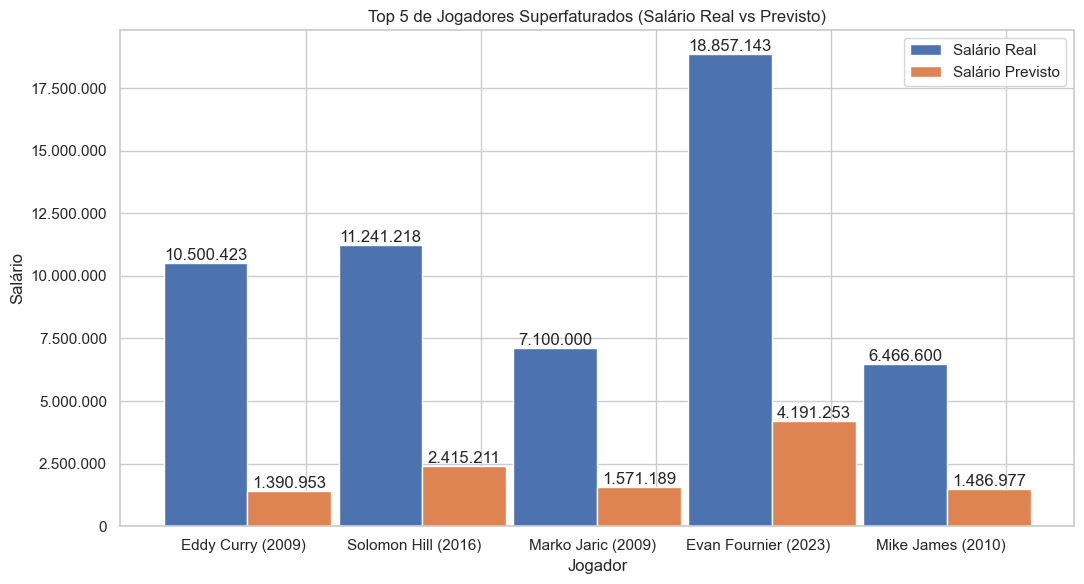

In [77]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

player_names = [nba_stats_df_with_numerical_salary.loc[index]['name'] + ' (' + str(nba_stats_df_with_numerical_salary.loc[index]['year']) + ')' for index in top_indices]
real_salaries = [nba_stats_df_with_numerical_salary.loc[index]['salary'] for index in top_indices]
predicted_salaries = [real / top_ratios[index] for real, index in zip(real_salaries, top_indices)]

bar_width = 0.55
indices = np.arange(len(player_names)) * 1.15

plt.figure(figsize=(11, 6))
bars1 = plt.bar(indices, real_salaries, bar_width, label='Salário Real')
bars2 = plt.bar(indices + bar_width, predicted_salaries, bar_width, label='Salário Previsto')

plt.xlabel('Jogador')
plt.ylabel('Salário')
plt.title('Top 5 de Jogadores Superfaturados (Salário Real vs Previsto)')
plt.xticks(indices + bar_width * 1.2, player_names, rotation=0, ha='right')
plt.legend()

def currency_format(x, pos=None):
    return f'{x:,.0f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_format))

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, currency_format(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, currency_format(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


Enquanto que o salário real de Evan Fournier em 2023 é o maior entre eles, a ordenação é feita com base no percentual do salário real comparado ao salário previsto. O salário real de Eddy Curry em 2009 é cerca de 750% do salário previsto, enquanto que no caso de Evan Fournier em 2023, esse valor é de apenas cerca de 460%.